In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dogs = pd.read_csv('dog.csv', sep=',')

In [3]:
dogs

,Year,Club,Position,Breed,Registrations
0,2006,UK Kennel Club,1,Labrador Retriever,45.7
1,2006,UK Kennel Club,2,English Cocker Spaniel,20.459
2,2006,UK Kennel Club,3,English Springer Spaniel,15.133
3,2006,UK Kennel Club,4,German Shepherd,12.857
4,2006,UK Kennel Club,5,Staffordshire Bull Terrier,12.729
...,...,...,...,...,...
125,2019,Club registration figures for 2024,6,Poodles,-
126,2019,Club registration figures for 2025,7,Beagles,-
127,2019,Club registration figures for 2026,8,Rottweilers,-
128,2019,Club registration figures for 2027,9,German Shorthaired Pointer,-


# Tratamento dos Dados

## 1 - Identificação e tratamento de valores ausentes/nulos (missing);

In [10]:
dogs.isnull().sum()

Year             0
Club             0
Position         0
Breed            0
Registrations    0
dtype: int64

In [4]:
'''
No dataframe em análise não foi constatado valores nulos, 
porém na coluna Registrations foi dectatado visualmente no dataFrame "-", " ", "." que ficultavam a análise. 
'''
dogs['Registrations']

0        45.7
1      20.459
2      15.133
3      12.857
4      12.729
        ...  
125         -
126         -
127         -
128         -
129         -
Name: Registrations, Length: 130, dtype: object

In [5]:
'''
Para realizar o tratamento dos dados necessarios, os metados a baixo foram utilizados para 
substituir os valores da coluna Registrations "-" para "0", retirar o espaçamento, o ponto, e por fim mudar 
o tipo do valor de objeto para inteiro
'''

dogs['Registrations'] = dogs['Registrations'].str.replace('-','0',regex=True)
dogs['Registrations'] = dogs['Registrations'].str.replace(' ','',regex=True)
dogs['Registrations'] = dogs['Registrations'].str.replace('.','',regex=True)
dogs['Registrations'] = dogs['Registrations'].astype(int)
dogs['Registrations']

0        457
1      20459
2      15133
3      12857
4      12729
       ...  
125        0
126        0
127        0
128        0
129        0
Name: Registrations, Length: 130, dtype: int32

## 2 -  Identificação e tratamento de valores atípicos (outliers);

- Outliers são valores atípicos em relação ao demais valores em um conjunto de dados, sabendo disso, para identificar nos gráficos a seguir foi utilizado o método boxplots, nele o outliers são representados como pontos além dos limites superiores e inferiores, logo os resultados dos gráficos das colunas Year, Position e Registrations não apresentaram valores anômolos ao demais valores do conjunto de dados.

<AxesSubplot: >

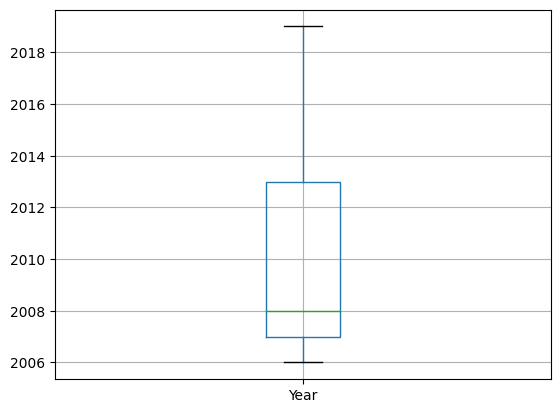

In [7]:
dogs.boxplot(column=['Year'])

<AxesSubplot: >

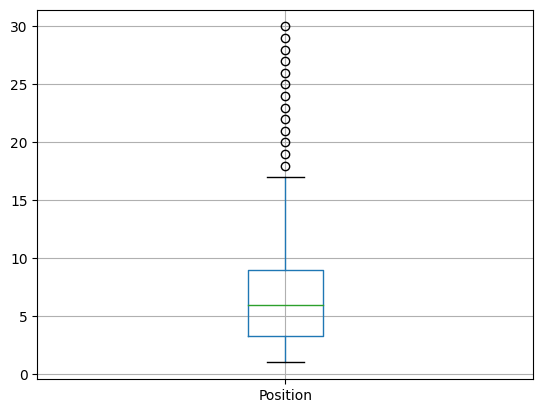

In [8]:
dogs.boxplot(column=['Position'])

<AxesSubplot: >

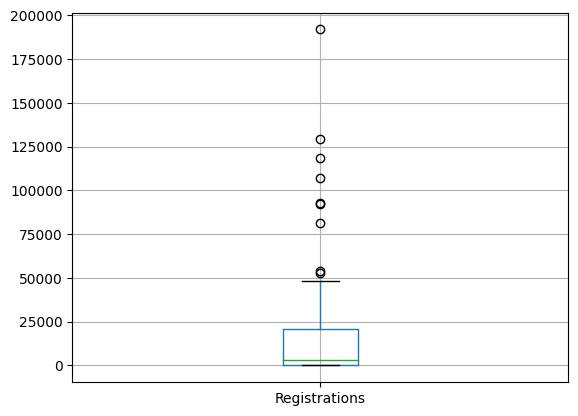

In [9]:
dogs.boxplot(column=['Registrations'])

## 3 - Tratamento em formato de dados


## 4 - Se vários datasets, identificar chaves primárias e realizar a junção (join)

- Como foi utilizado apenas um dataframe não foi necessario realizar a junção.

## 5 - Criação de novos dados para facilitar a análise (feature engineering)

- Por se tratar de um dataframe pequeno não foi necessário criar novos dados para substituir os originais

## 6 - Realizar 5 análises descritivas e gerar os respectivos gráficos


#### 1 - Qual é o Clube de cães mais popular ?

In [61]:
'''
Para ordenar a contagem do dataframe, se usa a função sort_values()
'''
grupo1 = dogs.groupby('Club').sum(numeric_only=True).Position.sort_values()

In [62]:
grupo1

Club
Club registration figures for 2019       1
Club registration figures for 2020       2
Club registration figures for 2021       3
Club registration figures for 2022       4
Club registration figures for 2023       5
Club registration figures for 2024       6
Club registration figures for 2025       7
Club registration figures for 2026       8
Club registration figures for 2027       9
Club registration figures for 2028      10
Ente Nazionale Cinofilia Italiana       55
UK Kennel Club                          55
Australian National Kennel Council      55
UK Kennel Club                          55
Canadian Kennel Club                   110
American Kennel Club                   165
FCI Worldwide Figures                  465
Name: Position, dtype: int64

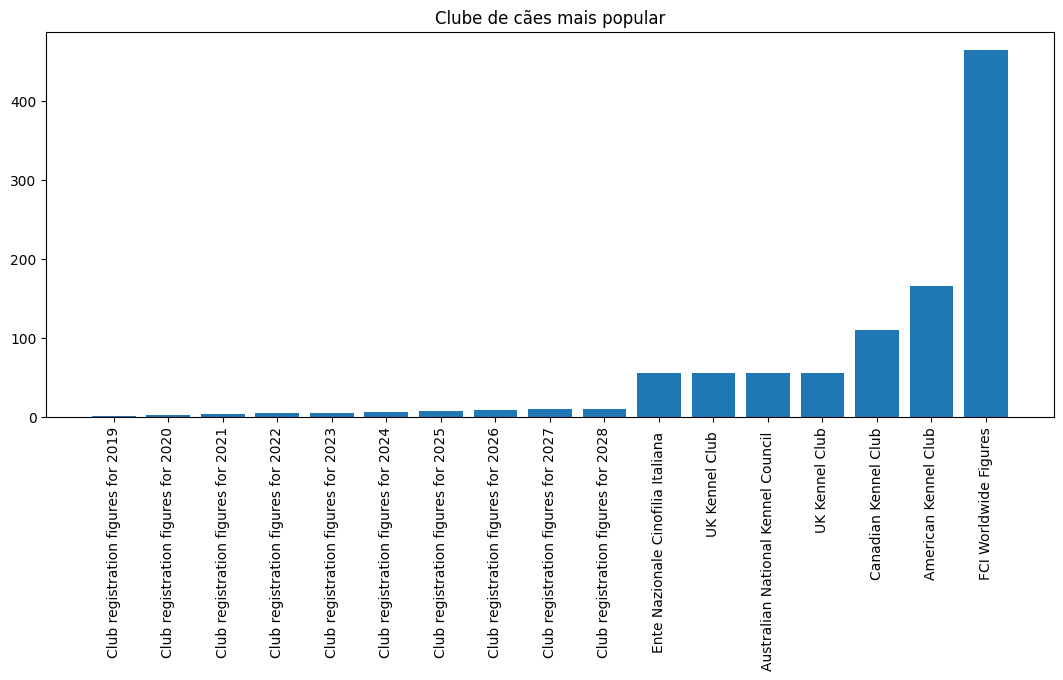

In [65]:
grupo1 = dogs.groupby('Club').sum(numeric_only=True).Position.sort_values()

plt.figure(figsize=(13,5))
plt.bar(grupo1.index,grupo1.values)
plt.title('Clube de cães mais popular')
plt.xticks(rotation=90)
plt.show()

#### 2 - Raças que ficaram em primeiro lugar??



In [4]:
primeiro_lugar_longo_anos = dogs[dogs.Position==1].groupby('Breed').count().Position.sort_values(ascending=False)

In [5]:
primeiro_lugar_longo_anos

Breed
Labrador Retriever    10
English Setter         1
Name: Position, dtype: int64

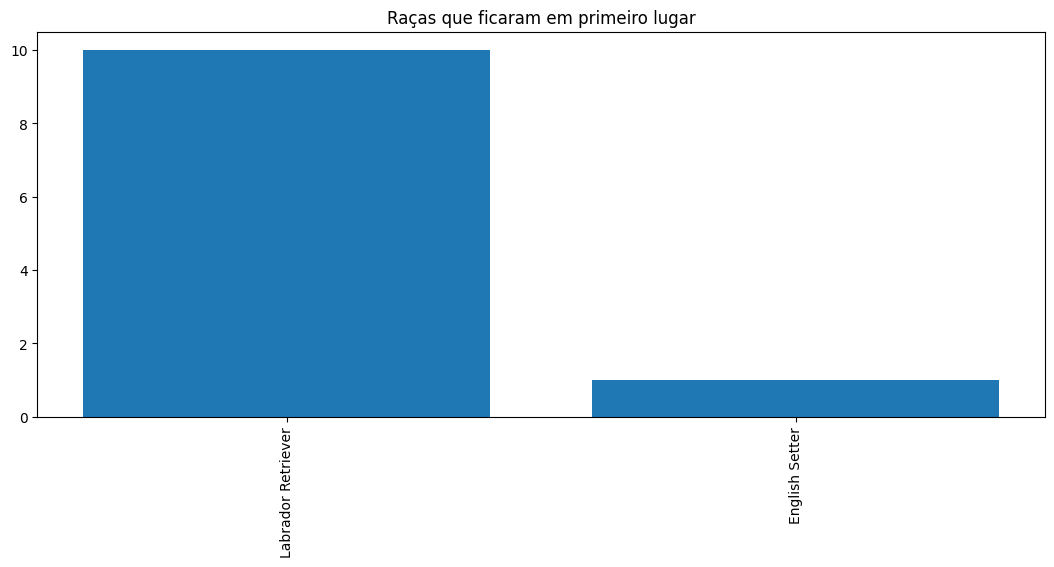

In [6]:
primeiro_lugar_longo_anos = dogs[dogs.Position==1].groupby('Breed').count().Position.sort_values(ascending=False)

plt.figure(figsize=(13,5))
plt.bar(primeiro_lugar_longo_anos.index, primeiro_lugar_longo_anos.values)
plt.title('Raças que ficaram em primeiro lugar')
plt.xticks(rotation=90)
plt.show()


#### 3 - Qual a raça de cão mais popular em 10 clubes de cães?




In [17]:
grupo3 = dogs.groupby(['Club','Breed']).sum(numeric_only=True).Position.sort_values()

In [18]:
grupo3

Club                                Breed                      
UK Kennel Club                      Labrador Retriever              1
FCI Worldwide Figures               Labrador Retriever              1
UK Kennel Club                      Labrador Retriever              1
Club registration figures for 2019  Labrador Retriever              1
Ente Nazionale Cinofilia Italiana   English Setter                  1
                                                                   ..
FCI Worldwide Figures               West Highland White Terrier    27
American Kennel Club                Shih Tzu                       28
FCI Worldwide Figures               Bernese Mountain Dog           28
                                    Great Dane                     29
                                    Brittany Spaniel               30
Name: Position, Length: 102, dtype: int64

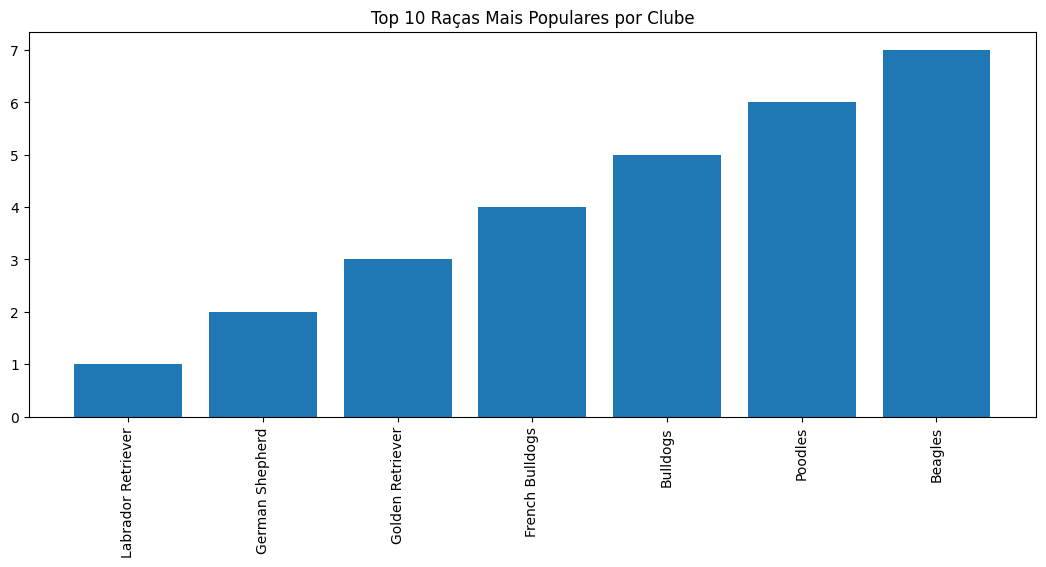

In [14]:
'''
Ao gerar o gráfico nota-se que apenas 7 raças de cães apareceram, mas devido alguns clubes apresentarem 
a mesma posição para respectivas raças, ou seja, alguns clubes obtiveram as mesmas posições de cães mais populares.
'''


grupo3 = dogs.groupby(['Club','Breed']).sum(numeric_only=True).Position.sort_values(ascending=False).head(3)
grupo3 = dogs.groupby('Club').first().head(10)

x = grupo3['Breed'].tolist()
y = grupo3['Position'].tolist()

plt.figure(figsize=(13,5))
plt.bar(x, y)
plt.title('Top 10 Raças Mais Populares por Clube')
plt.xticks(rotation=90)
plt.show()

#### 4 - Qual é a relação entre a raça e a posição?



In [74]:
grupo4 = dogs.groupby('Breed').count().Position.sort_values()

In [75]:
grupo4

Breed
French Bulldog                    1
Rottweilers                       1
Poodle (All sizes)                1
Poodles                           1
Pembroke Welsh Corgi              1
Maltese                           1
Jack Russell Terrier              1
Great Dane                        1
German Spitz (all sizes)          1
German Shepherd Dog               1
French Bulldogs                   1
Segugio Italiano a Pelo Raso      1
English Bulldog                   1
Dobermann                         1
Segugio Maremmano                 1
Dachshund (all varieties)         1
Beagles                           1
Brittany                          1
Dalmatian                         1
Bulldogs                          1
Brittany Spaniel                  1
Chihuahua                         1
Bulldog                           2
English Setter                    2
Rottweiler                        2
Pug                               2
Border Terrier                    2
Border Collie         

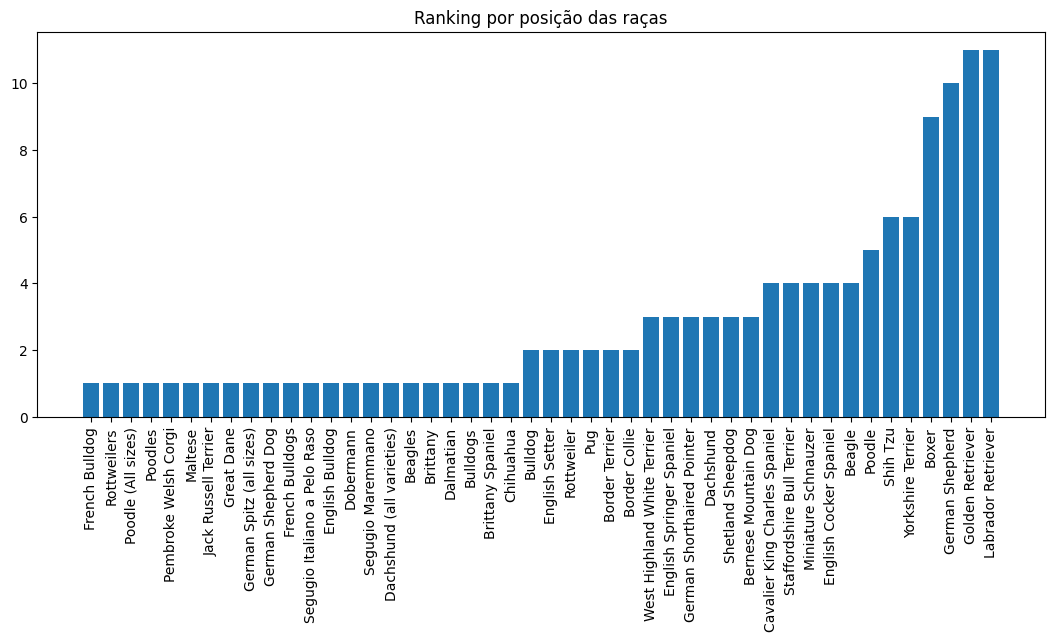

In [76]:
grupo4= dogs.groupby('Breed').count().Position.sort_values()

plt.figure(figsize=(13,5))
plt.bar(grupo4.index,grupo4.values)
plt.title('Ranking por posição das raças')
plt.xticks(rotation=90)
plt.show()

#### 5 - Qual é a distribuição de registros por posição?

In [77]:
grupo5 = dogs.groupby('Registrations').count().Position.sort_values()

In [78]:
grupo5

Registrations
23.562     1
42.962     1
40.53      1
40.174     1
4.491      1
          ..
19.828     1
15.133     1
14.899     1
123.76     1
-         40
Name: Position, Length: 91, dtype: int64

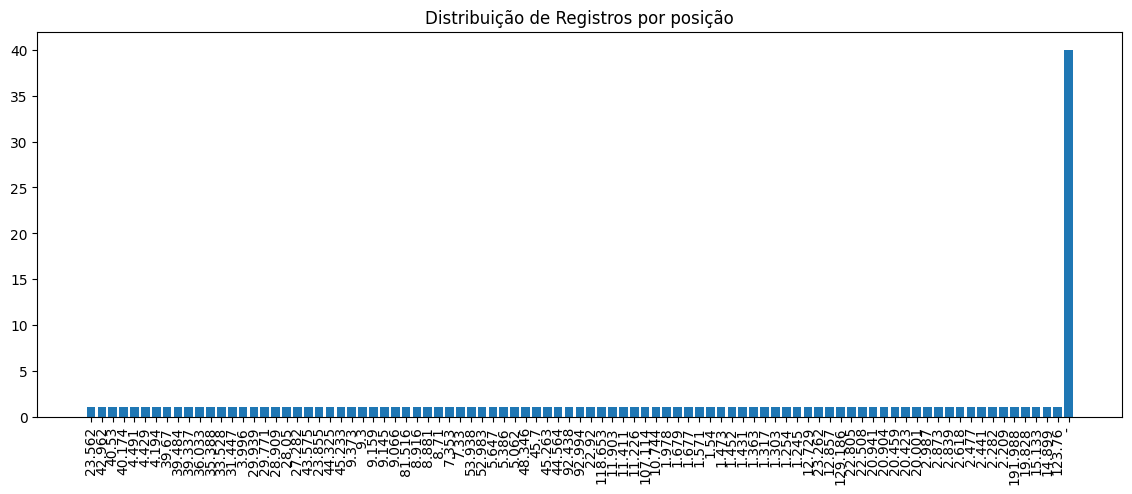

In [79]:
grupo5= dogs.groupby('Registrations').count().Position.sort_values()

plt.figure(figsize=(14,5))
plt.bar(grupo5.index,grupo5.values)
plt.title('Distribuição de Registros por posição')
plt.xticks(rotation=90)
plt.show()

#### 6 - Raças Mais Populares que Ficaram pelo Menos nos Três Primeiros Lugares

In [7]:
nos_tres_primeiros_lugares = dogs[(dogs.Position>=1) & (dogs.Position<=3)].groupby('Breed').count().Position.sort_values()

In [8]:
nos_tres_primeiros_lugares

Breed
English Setter                 1
German Shepherd Dog            1
Poodle (All sizes)             1
Segugio Maremmano              1
Staffordshire Bull Terrier     1
English Cocker Spaniel         2
English Springer Spaniel       2
Golden Retriever               3
Yorkshire Terrier              3
German Shepherd                8
Labrador Retriever            10
Name: Position, dtype: int64

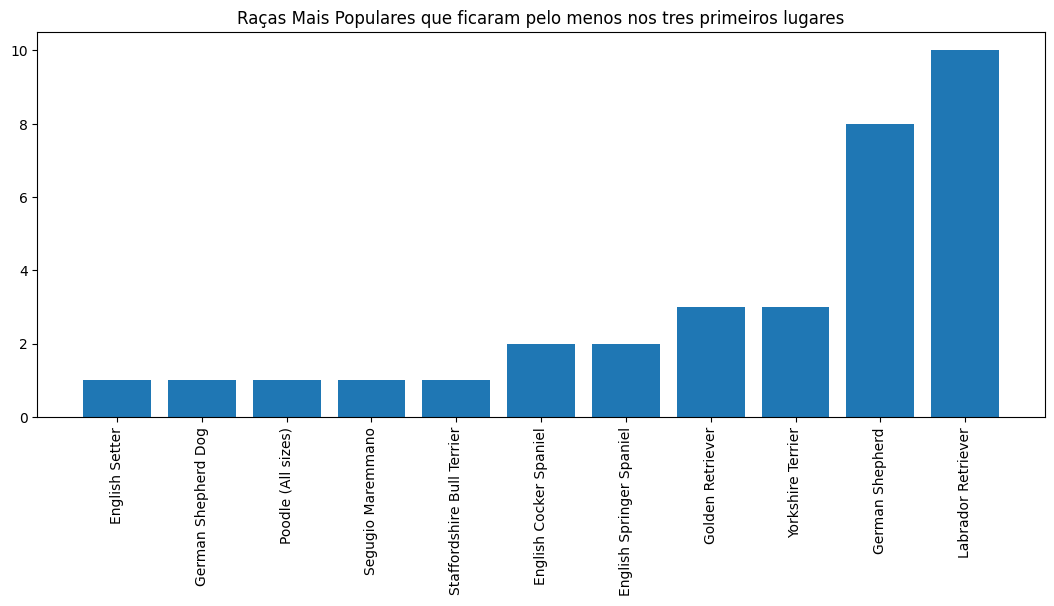

In [9]:
nos_tres_primeiros_lugares = dogs[(dogs.Position>=1) & (dogs.Position<=3)].groupby('Breed').count().Position.sort_values()
plt.figure(figsize=(13,5))
plt.bar(nos_tres_primeiros_lugares.index, nos_tres_primeiros_lugares.values)
plt.title('Raças Mais Populares que Ficaram pelo Menos nos Três Primeiros Lugares')
plt.xticks(rotation=90)
plt.show()